In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt

In [20]:
def full_pairplot(df:pd.DataFrame):
  g = sns.PairGrid(df, hue='Totals')
  g.map_upper(sns.kdeplot)
  g.map_lower(sns.scatterplot)
  g.map_diag(sns.histplot)
  g.add_legend()
  plt.show()

project_dir = os.path.dirname(os.getcwd())
stats_dir = os.path.join(project_dir,'data','derived','stats_categories')

files = os.listdir(stats_dir)
files

['DEFENSE_stats.csv',
 'FIELD_GOALS_stats.csv',
 'FUMBLES_stats.csv',
 'INTERCEPTIONS_stats.csv',
 'KICKOFFS_stats.csv',
 'KICKOFF_RETURNS_stats.csv',
 'PASSING_stats.csv',
 'PUNTING_stats.csv',
 'PUNT_RETURNS_stats.csv',
 'RECEIVING_stats.csv',
 'RUSHING_stats.csv',
 'SACKS_stats.csv',
 'SCORING_BY_QUARTERS_stats.csv',
 'SCORING_stats.csv',
 'SNAP_COUNTS_stats.csv',
 'TEAM_STATS_stats.csv']

In [4]:
df = pd.read_csv(os.path.join(stats_dir, files[0]), index_col=[0,1])
df.head()

Totals  BL   TKL   TT   TA   DT   DA  STT  STA  MT  MA  \
Year Team                                                                      
1999 lkc         Team Totals   1  1104  843  261  715  226  111   34  17   1   
     lkc    Opponents Totals   4  1045  781  264  671  240  100   24  10   0   
     har         Team Totals   2   943  727  216  623  207   90    9  14   0   
     har    Opponents Totals   0  1027  807  220  716  205   79   15  12   0   
     llarm       Team Totals   1   937  654  283  560  251   84   32  10   0   

            PD    QH  TFL  FF  
Year Team                      
1999 lkc    93  34.0   70  18  
     lkc    71  14.0   62  16  
     har    73  38.0   60  10  
     har    93  23.0   64  12  
     llarm  77  42.0   85  13

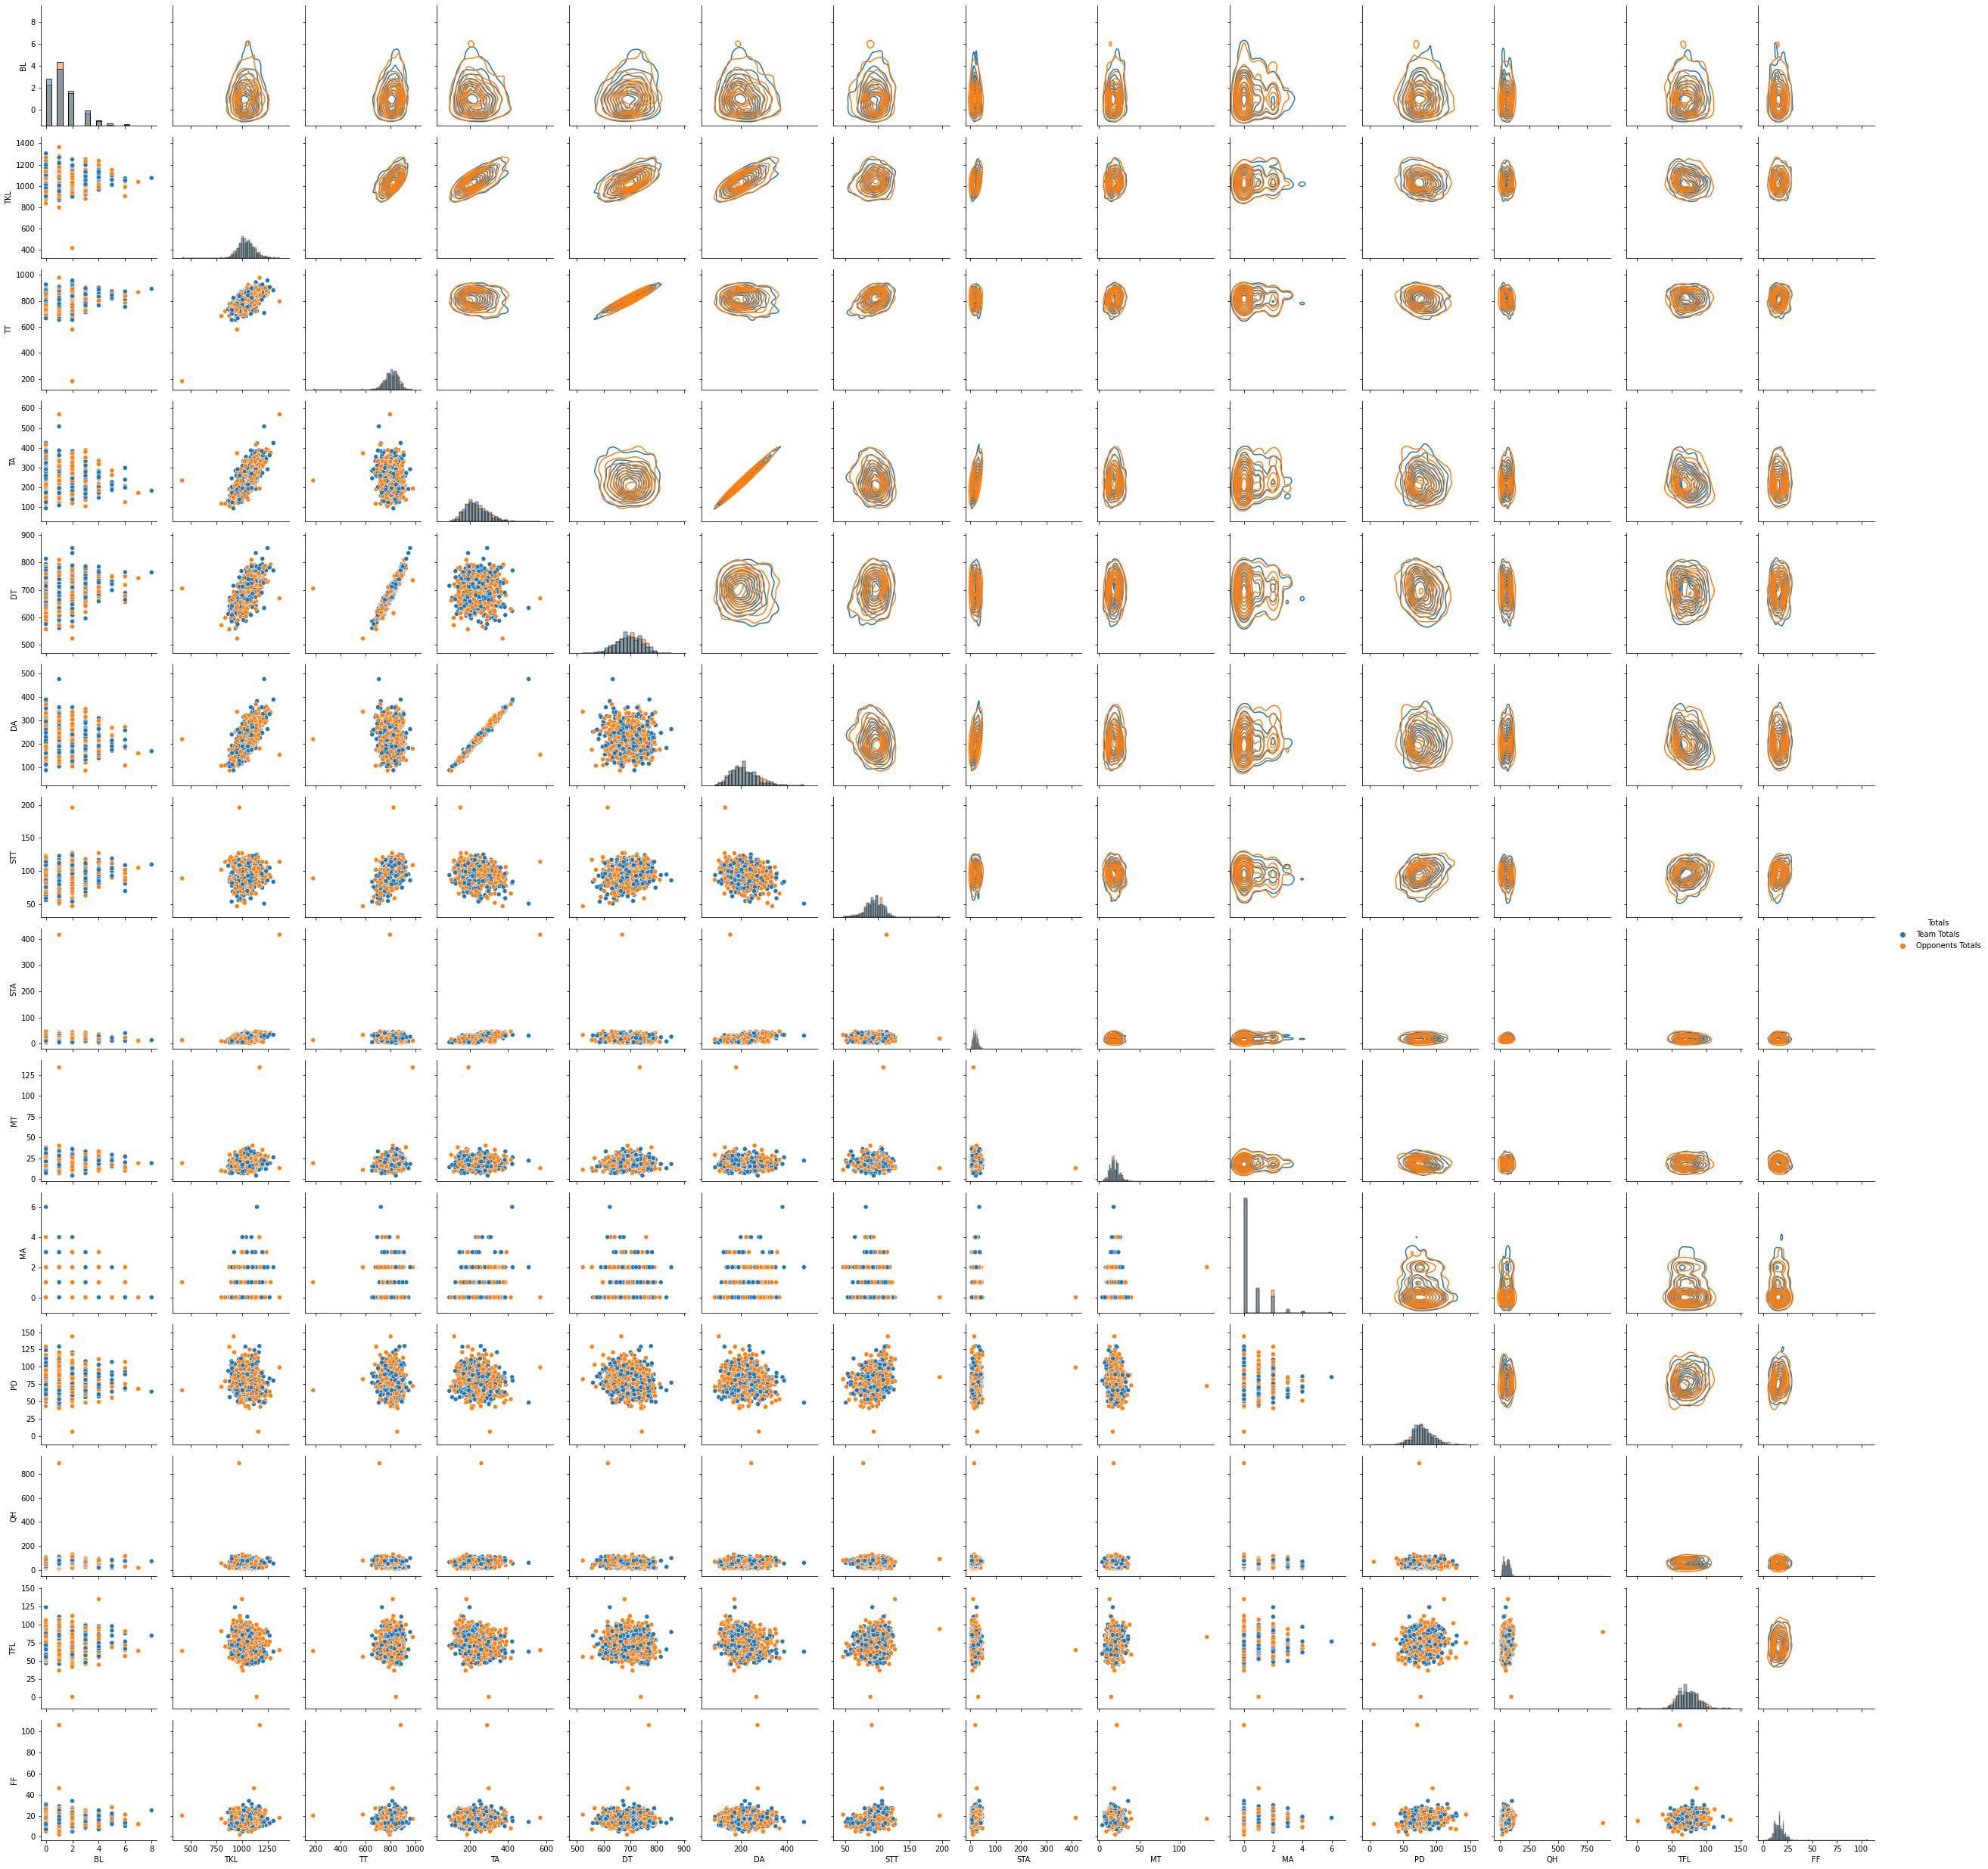

In [5]:
full_pairplot(df)

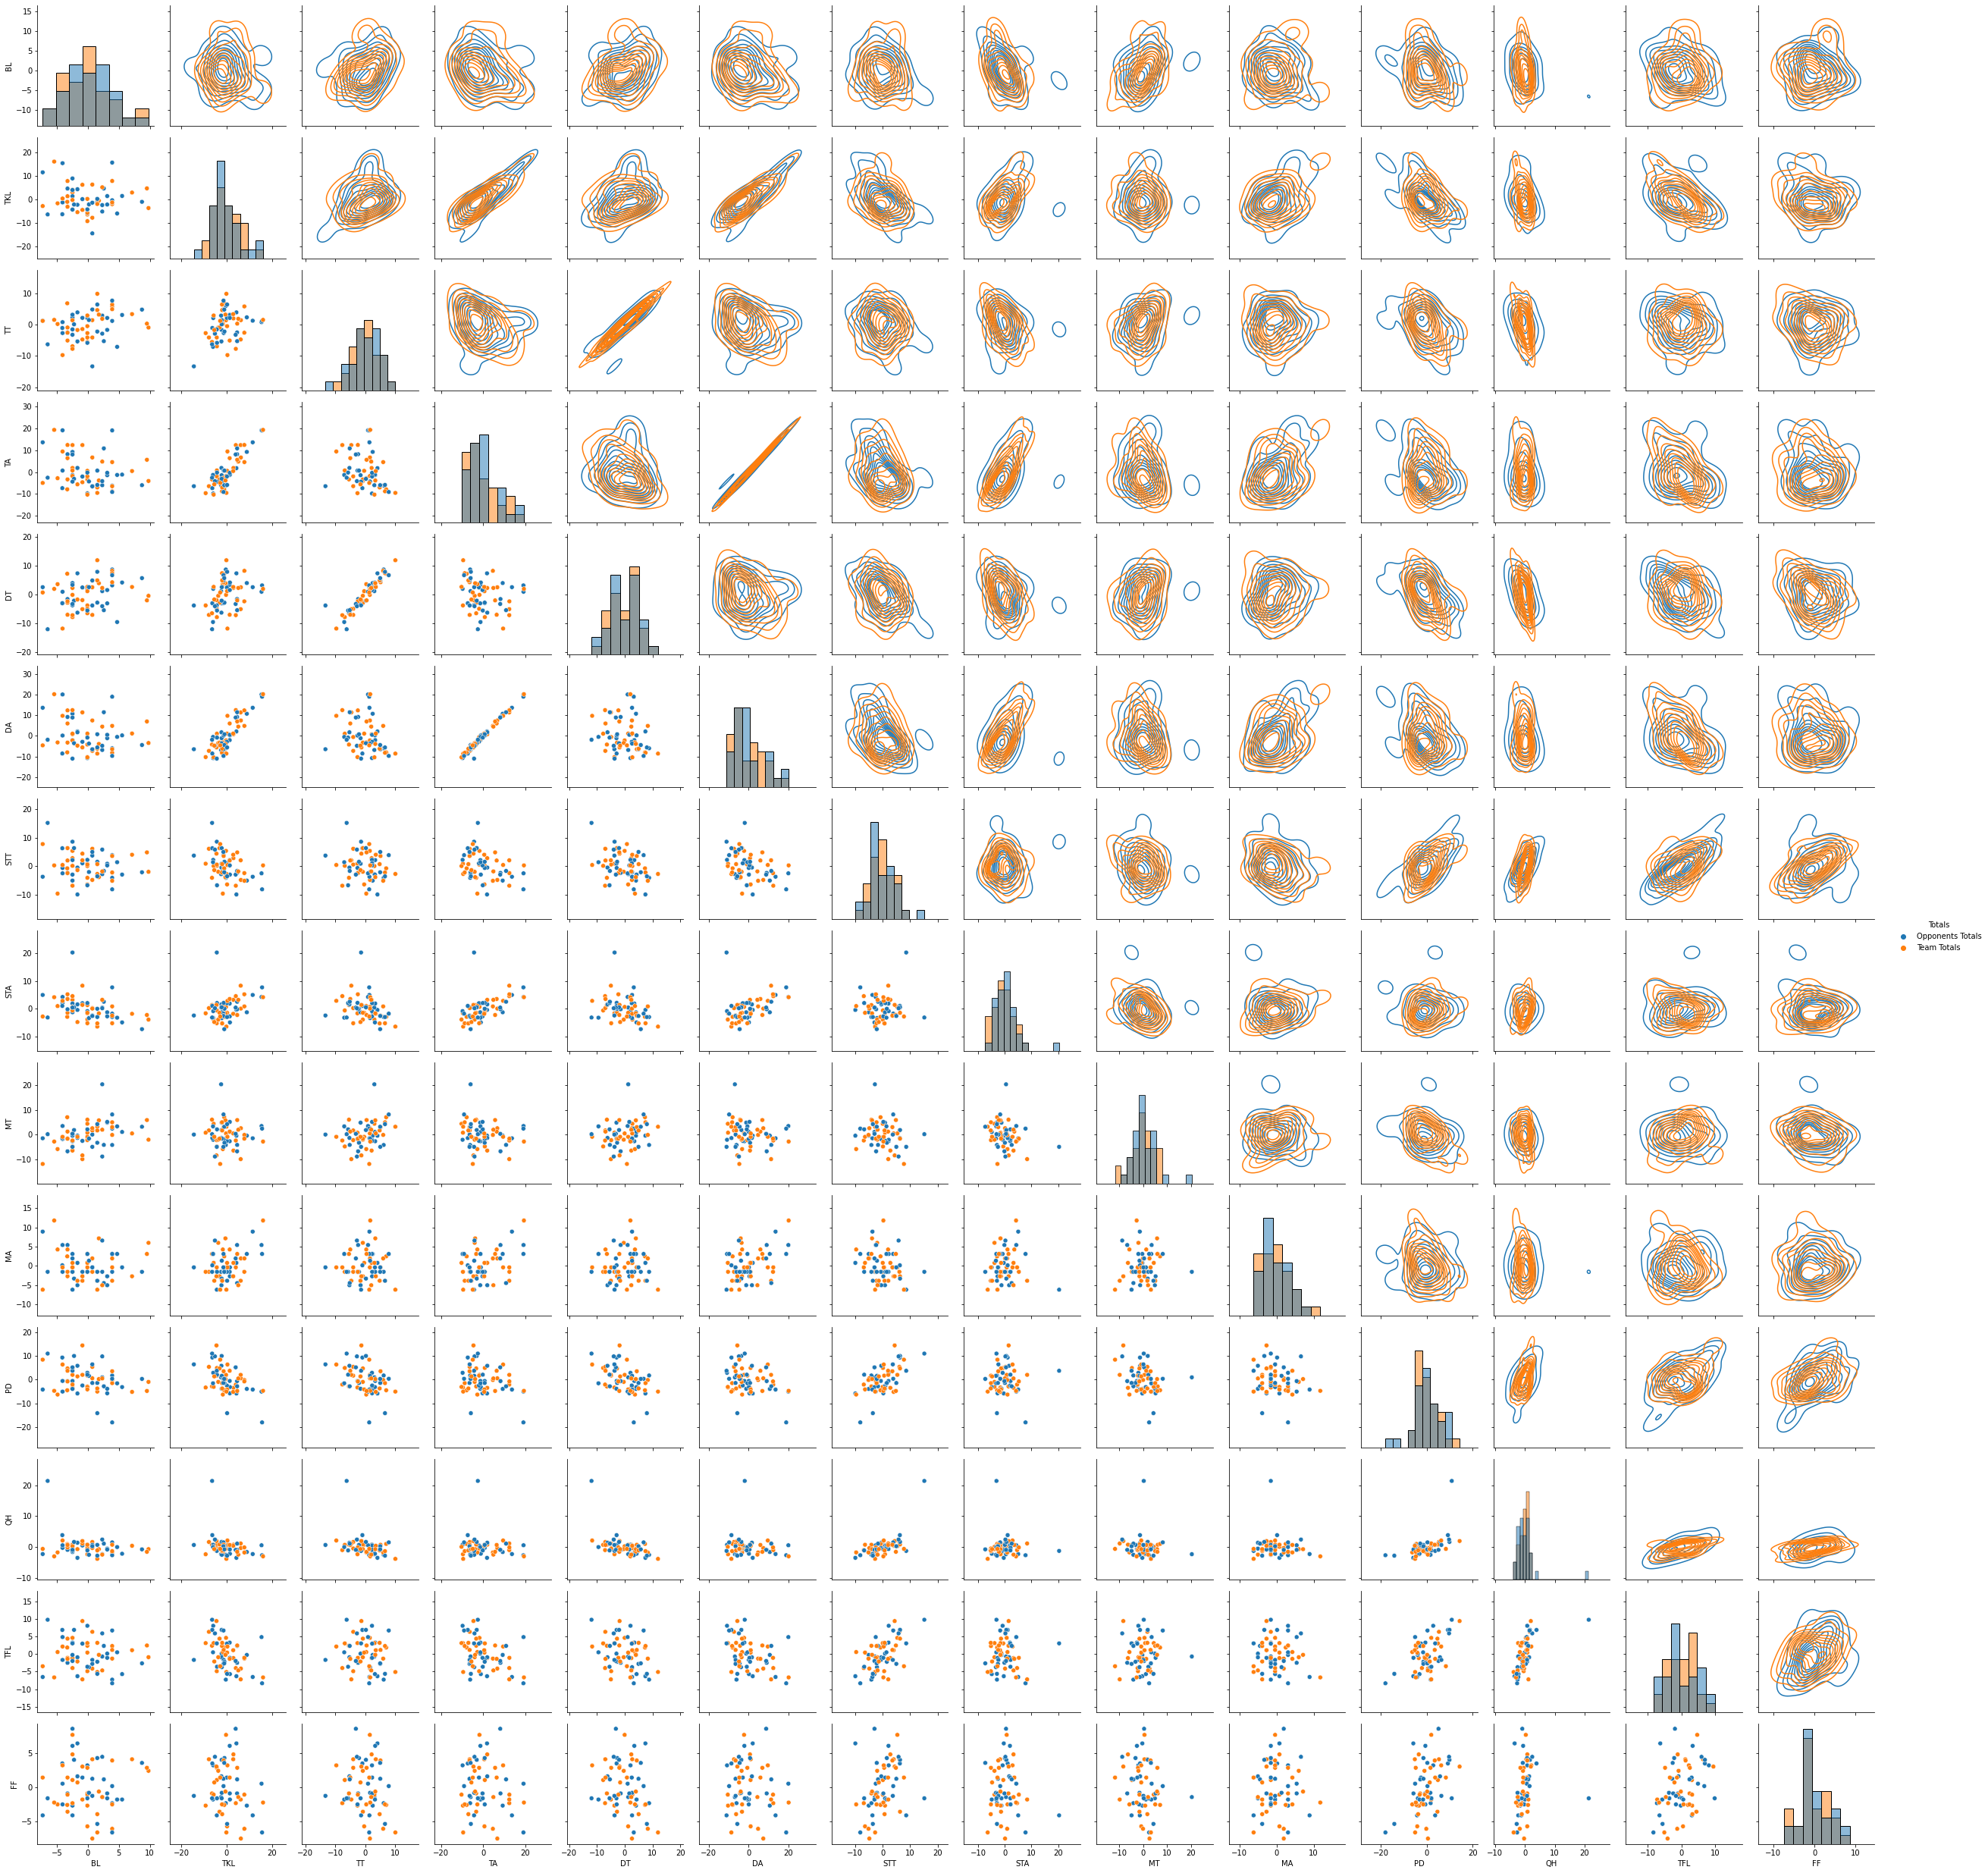

In [23]:
full_pairplot(df.groupby(['Team', 'Totals']).sum().reset_index('Totals'))

In [24]:
df.corr()

BL       TKL        TT        TA        DT        DA       STT  \
BL   1.000000  0.038619  0.133499 -0.074393  0.143828 -0.063663  0.049797   
TKL  0.038619  1.000000  0.645319  0.701675  0.589063  0.677753  0.101302   
TT   0.133499  0.645319  1.000000 -0.091407  0.881267 -0.086047  0.352761   
TA  -0.074393  0.701675 -0.091407  1.000000 -0.054113  0.963657 -0.196597   
DT   0.143828  0.589063  0.881267 -0.054113  1.000000 -0.036436  0.137350   
DA  -0.063663  0.677753 -0.086047  0.963657 -0.036436  1.000000 -0.237579   
STT  0.049797  0.101302  0.352761 -0.196597  0.137350 -0.237579  1.000000   
STA -0.061928  0.338949 -0.052886  0.491205 -0.079814  0.241619  0.061826   
MT   0.071369  0.130655  0.176252  0.006226  0.085202  0.021513 -0.061861   
MA   0.016413  0.125435 -0.031752  0.193259 -0.004511  0.189645 -0.124965   
PD  -0.003435 -0.150324 -0.109525 -0.093791 -0.206365 -0.118336  0.276802   
QH  -0.015997 -0.053012 -0.156450  0.071004 -0.142958  0.065907 -0.105643   
TFL  0.015251 -0.139594  0.023835 -0.204277 -0.040893 -0.202509  0.186764   
FF  -0.000824  0.059263  0.077636  0.004806  0.040479 -0.006200  0.232525   

          STA        MT        MA        PD        QH       TFL        FF  
BL  -0.061928  0.071369  0.016413 -0.003435 -0.015997  0.015251 -0.000824  
TKL  0.338949  0.130655  0.125435 -0.150324 -0.053012 -0.139594  0.059263  
TT  -0.052886  0.176252 -0.031752 -0.109525 -0.156450  0.023835  0.077636  
TA   0.491205  0.006226  0.193259 -0.093791  0.071004 -0.204277  0.004806  
DT  -0.079814  0.085202 -0.004511 -0.206365 -0.142958 -0.040893  0.040479  
DA   0.241619  0.021513  0.189645 -0.118336  0.065907 -0.202509 -0.006200  
STT  0.061826 -0.061861 -0.124965  0.276802 -0.105643  0.186764  0.232525  
STA  1.000000 -0.051038  0.034403  0.050363  0.074909 -0.079078  0.037994  
MT  -0.051038  1.000000  0.081467 -0.117050  0.028253  0.034132 -0.027628  
MA   0.034403  0.081467  1.000000 -0.090756 -0.025339 -0.050438 -0.018029  
PD   0.050363 -0.117050 -0.090756  1.000000 -0.035231  0.099383  0.146353  
QH   0.074909  0.028253 -0.025339 -0.035231  1.000000  0.054420 -0.008252  
TFL -0.079078  0.034132 -0.050438  0.099383  0.054420  1.000000  0.118840  
FF   0.037994 -0.027628 -0.018029  0.146353 -0.008252  0.118840  1.000000